# Decision Tree

## Classification

### Dataset Load - breast_cancer Dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
breast_cancer_dataset = load_breast_cancer()
X, y = breast_cancer_dataset.data, breast_cancer_dataset.target

In [4]:
print('shape of X:', X.shape)
print('shape of y', y.shape)
print('y:', y)

shape of X: (569, 30)
shape of y (569,)
y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 

### Data Preprocessing

In [11]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

### Learning

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf = DecisionTreeClassifier()

In [33]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Inference & Evaluation

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
y_train_hat = clf.predict(X_train)
print('train_accuracy: %.5f'%accuracy_score(y_train, y_train_hat))

train_accuracy: 1.00000


In [15]:
y_test_hat = clf.predict(X_test)
print('test_accuracy: %.5f'%accuracy_score(y_test, y_test_hat))

test_accuracy: 0.90909


### Hyperparameter search (min_samples_leaf)

In [16]:
training_accuracy =[]
test_accuracy = []

In [17]:
m_settings = [1, 2, 5, 7, 10, 20]

In [18]:
for m in m_settings:

    clf = DecisionTreeClassifier(min_samples_leaf = m)
    clf.fit(X_train, y_train)

    y_train_hat = clf.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_train_hat))

    y_test_hat = clf.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_test_hat))

In [20]:
import pandas as pd

In [21]:
result_df = pd.DataFrame({
        'min_samples_leaf': m_settings,
    'training_accuracy': training_accuracy,
    'test_accuracy': test_accuracy
})

In [22]:
display(result_df)

,min_samples_leaf,training_accuracy,test_accuracy
0,1,1.000000,0.860140
1,2,0.992958,0.874126
2,5,0.971831,0.937063
3,7,0.964789,0.937063
4,10,0.960094,0.937063
5,20,0.931925,0.916084


### sklearn 내장 함수를 활용한 Tree 시각화

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

In [57]:
clf = DecisionTreeClassifier(min_samples_leaf=30)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=30)

[Text(0.5454545454545454, 0.9, 'mean concave points <= 0.04892\ngini = 0.46786\nsamples = 426\nvalue = [159, 267]'),
 Text(0.36363636363636365, 0.7, 'worst area <= 766.45001\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.2727272727272727, 0.5, 'perimeter error <= 2.5995\ngini = 0.02586\nsamples = 229\nvalue = [3, 226]'),
 Text(0.18181818181818182, 0.3, 'worst texture <= 29.23\ngini = 0.01\nsamples = 199\nvalue = [1, 198]'),
 Text(0.09090909090909091, 0.1, 'gini = 0.0\nsamples = 169\nvalue = [0, 169]'),
 Text(0.2727272727272727, 0.1, 'gini = 0.06444\nsamples = 30\nvalue = [1, 29]'),
 Text(0.36363636363636365, 0.3, 'gini = 0.12444\nsamples = 30\nvalue = [2, 28]'),
 Text(0.45454545454545453, 0.5, 'gini = 0.43704\nsamples = 31\nvalue = [10, 21]'),
 Text(0.7272727272727273, 0.7, 'worst area <= 785.79999\ngini = 0.21193\nsamples = 166\nvalue = [146, 20]'),
 Text(0.6363636363636364, 0.5, 'gini = 0.49111\nsamples = 30\nvalue = [13, 17]'),
 Text(0.8181818181818182, 0.5, 'worst area 

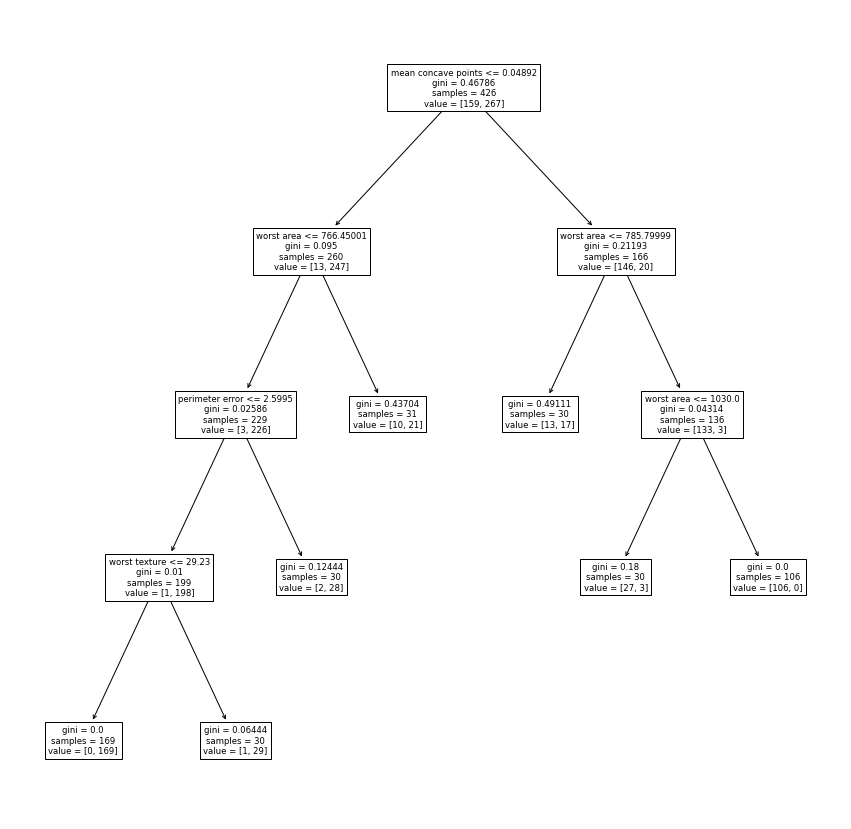

In [58]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(clf, precision=5, feature_names=breast_cancer_dataset.feature_names)

### Feature Importance 시각화 (Single Tree)

In [63]:
clf = DecisionTreeClassifier(min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [64]:
feature_importance = clf.feature_importances_

<BarContainer object of 30 artists>

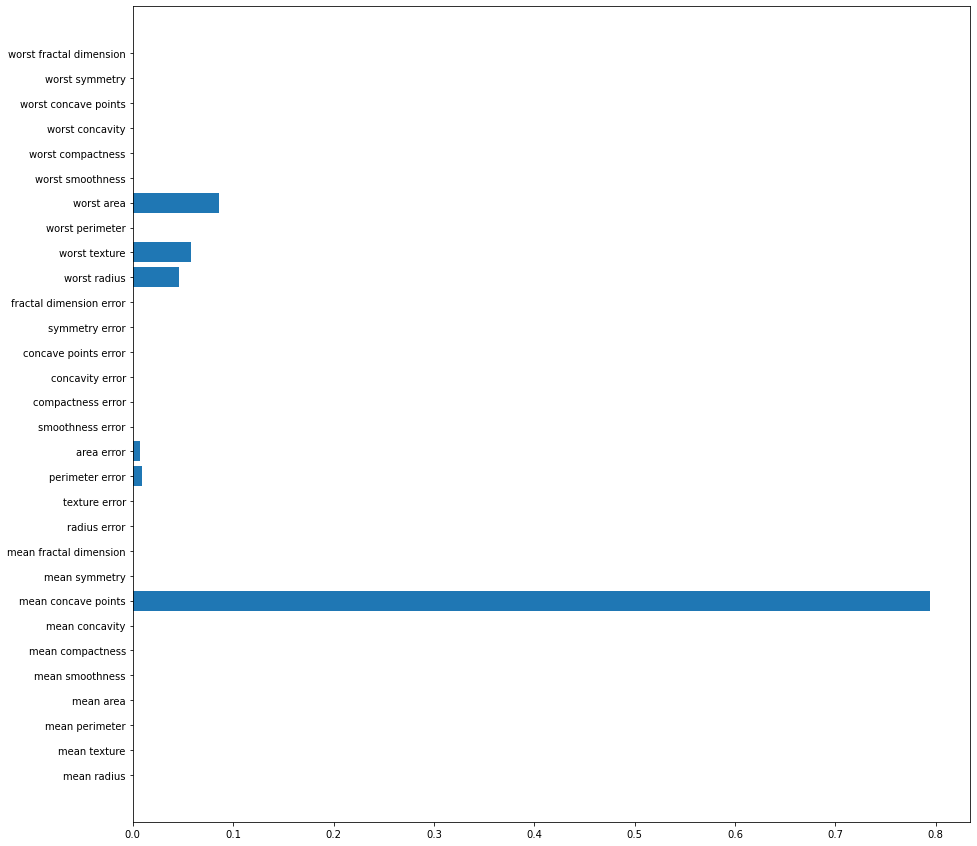

In [65]:
fig = plt.figure(figsize=(15,15))
plt.barh(breast_cancer_dataset.feature_names, feature_importance)

# Random Forest

## Classifiaction

### Dataset Load - breast_cancer Dataset

In [67]:
breast_cancer_dataset = load_breast_cancer()
X, y = breast_cancer_dataset.data, breast_cancer_dataset.target

In [68]:
print('shape of X:', X.shape)
print('shape of y', y.shape)
print('y:', y)

shape of X: (569, 30)
shape of y (569,)
y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 

### Data Preprocessing

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

### Learning

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
clf = RandomForestClassifier()

In [74]:
clf.fit(X_train, y_train)

RandomForestClassifier()

### Inference & Evaluation

In [76]:
y_train_hat = clf.predict(X_train)
print('train_accuracy: %.5f'%accuracy_score(y_train, y_train_hat))

train_accuracy: 1.00000


In [77]:
y_test_hat = clf.predict(X_test)
print('test_accuracy: %.5f'%accuracy_score(y_test, y_test_hat))

test_accuracy: 0.97203


### Hyperparameter search (n_estimators)

In [85]:
training_accuracy = []
test_accuracy = []

In [86]:
n_settings = [1, 2, 5, 10, 20, 50, 100]

In [87]:
for n in n_settings:

    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)

    y_train_hat = clf.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    
    y_test_hat = clf.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, y_test_hat))

In [88]:
result_df = pd.DataFrame({
        'n_estimators': n_settings,
    'training_accuracy': training_accuracy,
    'test_accuracy': test_accuracy
})

In [89]:
display(result_df)

,n_estimators,training_accuracy,test_accuracy
0,1,0.974178,0.937063
1,2,0.955399,0.881119
2,5,0.997653,0.944056
3,10,1.000000,0.944056
4,20,1.000000,0.972028
5,50,1.000000,0.972028
6,100,1.000000,0.972028


### Feature Importance 시각화 (Random Forest)

In [90]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
feature_importance = clf.feature_importances_

<BarContainer object of 30 artists>

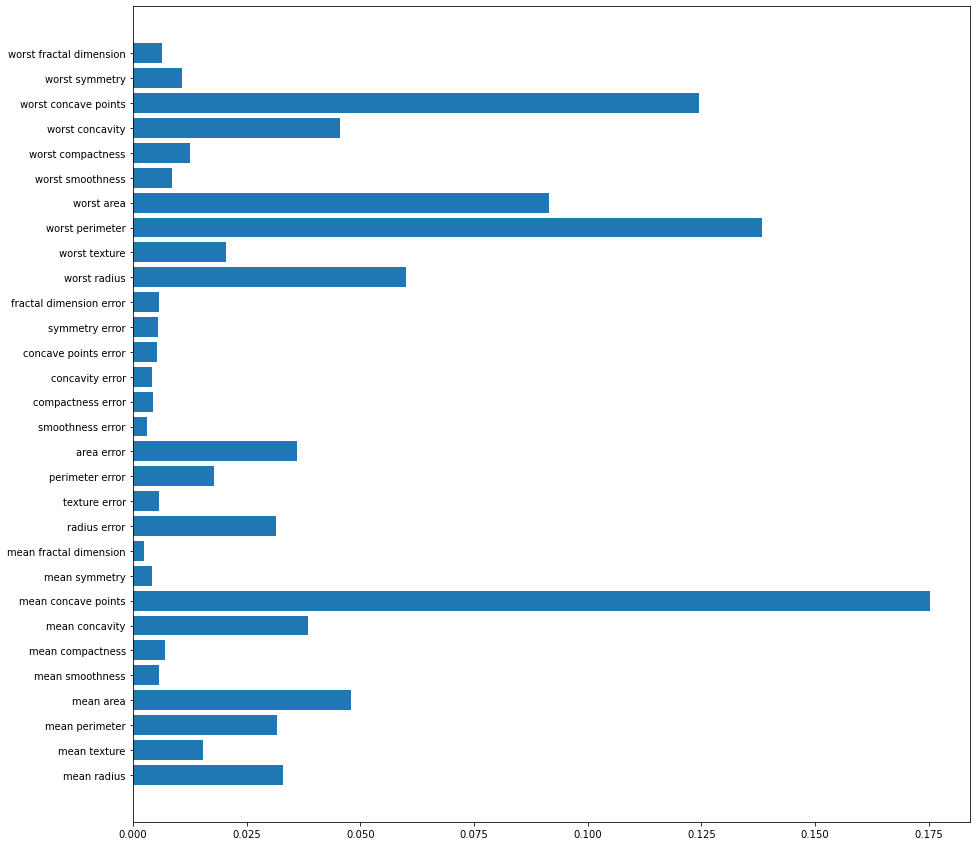

In [92]:
fig = plt.figure(figsize=(15,15))
plt.barh(breast_cancer_dataset.feature_names, feature_importance)